In [85]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://downloads.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz

!tar -xvf spark-3.5.1-bin-hadoop3.tgz

!pip install -q findspark

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

import findspark

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

from google.colab import files

#uploaded = files.upload()
#upload files test2_new.txt, output3.txt

import pandas as pd
import numpy as np
import csv

from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator


spark-3.5.1-bin-hadoop3/
spark-3.5.1-bin-hadoop3/sbin/
spark-3.5.1-bin-hadoop3/sbin/spark-config.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/start-workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-all.sh
spark-3.5.1-bin-hadoop3/sbin/stop-all.sh
spark-3.5.1-bin-hadoop3/sbin/workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/spark-daemon.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-worker.sh
spark-3.5.1-bin-hadoop3/sbin/slaves.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-shuffle-service.sh
spark-3.5.1-bin-hadoop3/sbin/stop-history-server.sh
spark-3.5.1-bin-hadoop3/sbin/stop-worker.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-thriftserver.sh
spark-3.5.1-bin-hadoop3/sbin/start-worker.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-connect-server.sh


In [86]:
ratings_df = pd.read_csv('test2_new.txt', sep="|", header=None)
test_df = pd.read_csv('output3.txt', sep="|")
ratings_df.rename(columns = {0:'UserID', 1:'TrackID', 2:'Rating'}, inplace = True)
train_df = ratings_df.merge(test_df)
sub_train_df = train_df[["AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]]
sub_train_df = pd.concat([sub_train_df, ratings_df["Rating"]], axis="columns")
sub_train_df = spark.createDataFrame(sub_train_df)
sub_train_df.show()
sub_test_df = test_df[["UserID", "TrackID", "AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]]
sub_test_df = spark.createDataFrame(sub_test_df)

+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+------+
|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|Rating|
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+------+
|       90.0|        50.0|        90.0|        80.0|         0.0|         0.0|         0.0|         0.0|         0.0|                2|         90.0|          0.0|         170.0|              85.0|1481.6326530612243|     1|
|       90.0|         0.0|        90.0|        80.0|         0.0|         0.0|         0.0|         0.0|

In [10]:
# for testing purposes only
"""
print(ratings_df.head(10))
print(test_df.head(10))
print(len(ratings_df))
print(len(test_df))
#train_df = test_df[["UserID", "TrackID"]]
train_df = ratings_df.merge(test_df)
print(train_df.head(10))
print(len(train_df))
#esh = test_df.query('UserID == 200031')
#print(esh)
# DROP USERID AND TRACKID FOR TRAINING AND POSSIBLY MOVE RATINGS COLUMN TO END
#sub_train_df = train_df[["AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]]
print(sub_train_df.head(10))
print(sub_train_df.dtypes)
"""

   UserID  TrackID  Rating
0  200031    30877       1
1  200031     8244       1
2  200031   130183       0
3  200031   198762       0
4  200031    34503       1
5  200031   227283       0
6  200032   218377       0
7  200032   110262       0
8  200032    18681       1
9  200032   138493       1
   UserID  TrackID  AlbumRating  ArtistRating  Genre1Rating  Genre2Rating  \
0  199810   208019          0.0           0.0           0.0           0.0   
1  199810    74139          0.0           0.0           0.0          80.0   
2  199810     9903          0.0           0.0           0.0           0.0   
3  199810   242681          0.0           0.0           0.0           0.0   
4  199810    18515          0.0          70.0           0.0           0.0   
5  199810   105760          0.0          90.0          80.0          80.0   
6  199812   276940          0.0           0.0           0.0           0.0   
7  199812   142408        100.0         100.0          80.0           0.0   
8  199812 

In [87]:
# possibly add standard scaler
features = ["AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]
assembler = VectorAssembler(inputCols=features, outputCol='Features')
sub_train_df = assembler.transform(sub_train_df)
sub_test_df = assembler.transform(sub_test_df)
"""
pipeline = Pipeline(stages = assembler)
pipelineModel = pipeline.fit(sub_train_df)
sub_train_df = pipelineModel.transform(sub_train_df)
"""
sub_train_df.show()
sub_test_df.show()

+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+------+--------------------+
|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|Rating|            Features|
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+------+--------------------+
|       90.0|        50.0|        90.0|        80.0|         0.0|         0.0|         0.0|         0.0|         0.0|                2|         90.0|          0.0|         170.0|              85.0|1481.6326530612243|     1|[90.0,50.0,90.0,8...|
|       90.0|       

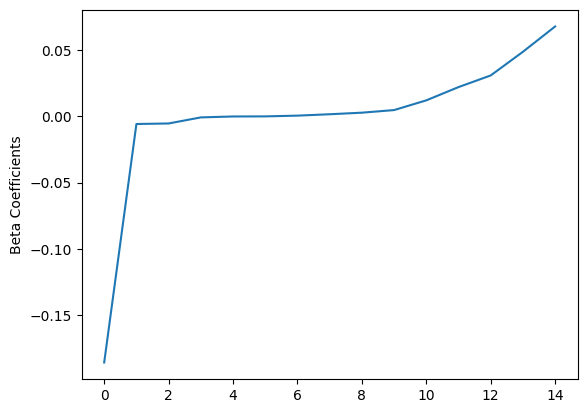

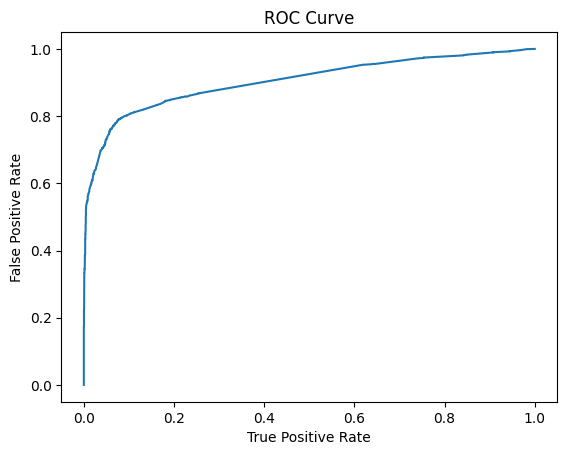

Training set areaUnderROC: 0.9040001666666673
+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|UserID|TrackID|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|            Features|       rawPrediction|         probability|prediction|
+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|199810| 208019|        0.0|        

In [88]:
#Logistic Regression
lr = LogisticRegression(featuresCol = "Features", labelCol = "Rating", maxIter=10)
lrModel = lr.fit(sub_train_df)
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel("Beta Coefficients")
plt.show()
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc["FPR"],roc["TPR"])
plt.ylabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("Training set areaUnderROC: " + str(trainingSummary.areaUnderROC))
predictions = lrModel.transform(sub_test_df)
predictions.show(10)
predictions.count()
#evaluator = BinaryClassificationEvaluator()
#print("Test Area Under ROC", evaluator.evaluate(predictions))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_lr.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()



In [89]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol = "Features",
labelCol = "Rating", maxDepth = 5)
dtModel = dt.fit(sub_train_df)
predictions = dtModel.transform(sub_test_df)
predictions.show(10)
print(predictions.count())
evaluator = BinaryClassificationEvaluator()
#print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_dt.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------+--------------------+----------+
|UserID|TrackID|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|            Features| rawPrediction|         probability|prediction|
+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------+--------------------+----------+
|199810| 208019|        0.0|         0.0|         0.0|         0.0|         0.0|         0.0|       

In [90]:
# Random Forest Classifier
rf = RandomForestClassifier(featuresCol = "Features", labelCol = "Rating")
rfModel = rf.fit(sub_train_df)
predictions = rfModel.transform(sub_test_df)
predictions.show()
print(predictions.count())
evaluator = BinaryClassificationEvaluator()
#print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"}))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_rf.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|UserID|TrackID|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|            Features|       rawPrediction|         probability|prediction|
+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|199810| 208019|        0.0|         0.0|         0.0|         0.0|         0.0|  

In [91]:
# Gradient Boosted Tree Classifier
gbt = GBTClassifier(featuresCol= "Features", labelCol= "Rating", maxIter=10)
gbtModel = gbt.fit(sub_train_df)
predictions = gbtModel.transform(sub_test_df)
predictions.show()
print(predictions.count())
evaluator = BinaryClassificationEvaluator()
#print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, evaluator.metricName: "areaUnderROC"))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_gbt.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|UserID|TrackID|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|            Features|       rawPrediction|         probability|prediction|
+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|199810| 208019|        0.0|         0.0|         0.0|         0.0|         0.0|  

In [84]:
# test block before implementing csv write outs
"""
predictions_pandas = predictions.toPandas()
predictions_pandas.head()
print(len(predictions_pandas))
print(predictions_pandas["UserID"][0])
print(predictions_pandas["UserID"][len(predictions_pandas)-1])
print(predictions_pandas["TrackID"][0])
print(predictions_pandas["TrackID"][len(predictions_pandas)-1])
print(predictions_pandas["prediction"][0])
print(predictions_pandas["prediction"][len(predictions_pandas)-1])
"""

120000
199810
249010
208019
262811
0.0
1.0
